In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
from scipy.spatial.distance import cdist

In [2]:
df=pd.read_csv('CC GENERAL.csv', sep=',')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


DATA PREPROCESSING :

In [3]:
df.isnull().sum().sum()

314

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [6]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df.isnull().sum(),df['MINIMUM_PAYMENTS'].describe()

(CUST_ID                             0
 BALANCE                             0
 BALANCE_FREQUENCY                   0
 PURCHASES                           0
 ONEOFF_PURCHASES                    0
 INSTALLMENTS_PURCHASES              0
 CASH_ADVANCE                        0
 PURCHASES_FREQUENCY                 0
 ONEOFF_PURCHASES_FREQUENCY          0
 PURCHASES_INSTALLMENTS_FREQUENCY    0
 CASH_ADVANCE_FREQUENCY              0
 CASH_ADVANCE_TRX                    0
 PURCHASES_TRX                       0
 CREDIT_LIMIT                        1
 PAYMENTS                            0
 MINIMUM_PAYMENTS                    0
 PRC_FULL_PAYMENT                    0
 TENURE                              0
 dtype: int64,
 count     8950.000000
 mean       864.206542
 std       2330.588021
 min          0.019163
 25%        170.857654
 50%        335.628312
 75%        864.206542
 max      76406.207520
 Name: MINIMUM_PAYMENTS, dtype: float64)

In [7]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [8]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df.isnull().sum(),df['CREDIT_LIMIT'].describe()

(CUST_ID                             0
 BALANCE                             0
 BALANCE_FREQUENCY                   0
 PURCHASES                           0
 ONEOFF_PURCHASES                    0
 INSTALLMENTS_PURCHASES              0
 CASH_ADVANCE                        0
 PURCHASES_FREQUENCY                 0
 ONEOFF_PURCHASES_FREQUENCY          0
 PURCHASES_INSTALLMENTS_FREQUENCY    0
 CASH_ADVANCE_FREQUENCY              0
 CASH_ADVANCE_TRX                    0
 PURCHASES_TRX                       0
 CREDIT_LIMIT                        0
 PAYMENTS                            0
 MINIMUM_PAYMENTS                    0
 PRC_FULL_PAYMENT                    0
 TENURE                              0
 dtype: int64,
 count     8950.000000
 mean      4494.449450
 std       3638.612411
 min         50.000000
 25%       1600.000000
 50%       3000.000000
 75%       6500.000000
 max      30000.000000
 Name: CREDIT_LIMIT, dtype: float64)

In [9]:
df=df.drop("CUST_ID", axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


SCALLING AND NORMALIZING THE DATA :

In [10]:
df_scaled=df.apply(zscore)
df_scaled=normalize(df_scaled)

In [11]:
df_scaled

array([[-0.31193826, -0.10629684, -0.1810716 , ..., -0.13251924,
        -0.22396426,  0.15370408],
       [ 0.21992533,  0.03753859, -0.13122171, ...,  0.02495877,
         0.06545742,  0.10079608],
       [ 0.12668203,  0.14678317, -0.03050449, ..., -0.02880315,
        -0.14889876,  0.10218749],
       ...,
       [-0.1569743 , -0.03932355, -0.085222  , ..., -0.07112317,
         0.0697948 , -0.87408185],
       [-0.15431961, -0.03841074, -0.09724043, ..., -0.07184155,
         0.06817468, -0.85379209],
       [-0.11520725, -0.17888144,  0.00848011, ..., -0.06699181,
        -0.10574557, -0.82953785]])

In [12]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [13]:
df_scaled

array([[-0.31193826, -0.10629684, -0.1810716 , ..., -0.13251924,
        -0.22396426,  0.15370408],
       [ 0.21992533,  0.03753859, -0.13122171, ...,  0.02495877,
         0.06545742,  0.10079608],
       [ 0.12668203,  0.14678317, -0.03050449, ..., -0.02880315,
        -0.14889876,  0.10218749],
       ...,
       [-0.1569743 , -0.03932355, -0.085222  , ..., -0.07112317,
         0.0697948 , -0.87408185],
       [-0.15431961, -0.03841074, -0.09724043, ..., -0.07184155,
         0.06817468, -0.85379209],
       [-0.11520725, -0.17888144,  0.00848011, ..., -0.06699181,
        -0.10574557, -0.82953785]])

In [14]:
df2=pd.DataFrame(df_scaled,columns=df.columns)
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146893,0.103128,-0.066344,-0.071050,-0.026403,-0.092916,0.252770,-0.135091,0.234852,-0.134432,-0.094764,-0.069751,-0.191180,-0.096784,-6.964046e-02,0.235672,-0.820660
8946,-0.151521,0.105735,-0.067173,-0.072846,-0.025067,-0.095266,0.259162,-0.138507,0.240791,-0.137832,-0.097161,-0.071515,-0.196014,-0.102738,-8.960492e-17,-0.107259,-0.841413
8947,-0.156974,-0.039324,-0.085222,-0.075675,-0.062521,-0.098965,0.181181,-0.143885,0.161230,-0.143183,-0.100933,-0.082821,-0.203625,-0.120978,-7.112317e-02,0.069795,-0.874082
8948,-0.154320,-0.038411,-0.097240,-0.073918,-0.094139,-0.093057,-0.253016,-0.140545,-0.189902,0.032623,-0.037897,-0.122556,-0.227357,-0.120224,-7.184155e-02,0.068175,-0.853792


HIERARCHICAL CLUSTERING : n_clusters=5

In [15]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df2)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [16]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative
df2['Agglo_clust_labels']=clust_labels
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agglo_clust_labels
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704,0
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796,4
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187,1
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244,0
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146893,0.103128,-0.066344,-0.071050,-0.026403,-0.092916,0.252770,-0.135091,0.234852,-0.134432,-0.094764,-0.069751,-0.191180,-0.096784,-6.964046e-02,0.235672,-0.820660,4
8946,-0.151521,0.105735,-0.067173,-0.072846,-0.025067,-0.095266,0.259162,-0.138507,0.240791,-0.137832,-0.097161,-0.071515,-0.196014,-0.102738,-8.960492e-17,-0.107259,-0.841413,4
8947,-0.156974,-0.039324,-0.085222,-0.075675,-0.062521,-0.098965,0.181181,-0.143885,0.161230,-0.143183,-0.100933,-0.082821,-0.203625,-0.120978,-7.112317e-02,0.069795,-0.874082,4
8948,-0.154320,-0.038411,-0.097240,-0.073918,-0.094139,-0.093057,-0.253016,-0.140545,-0.189902,0.032623,-0.037897,-0.122556,-0.227357,-0.120224,-7.184155e-02,0.068175,-0.853792,4


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

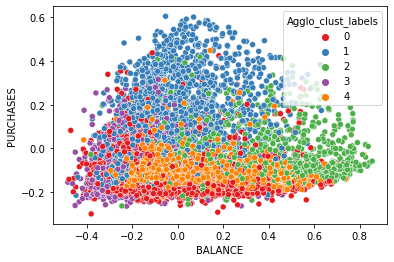

In [17]:
sns.set_palette('Set2')
sns.scatterplot(x=df2['BALANCE'],y=df2['PURCHASES'],hue=df2['Agglo_clust_labels'],palette='Set1')

HIERARCHICAL CLUSTERING : n_clusters=3

In [18]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df2)  #Applying agglomerative algorithm with 3 clusters, using euclidean distance as a metric

In [19]:
agglomerative=pd.DataFrame(clust_labels)
df2['Agglo_clust_labels']=clust_labels


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

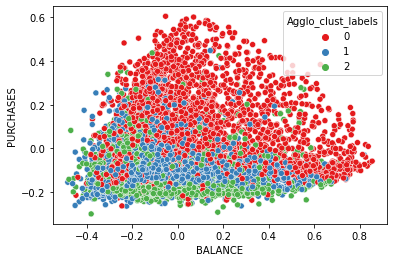

In [20]:
sns.set_palette('Set2')
sns.scatterplot(x=df2['BALANCE'],y=df2['PURCHASES'],hue=df2['Agglo_clust_labels'],palette='Set1')

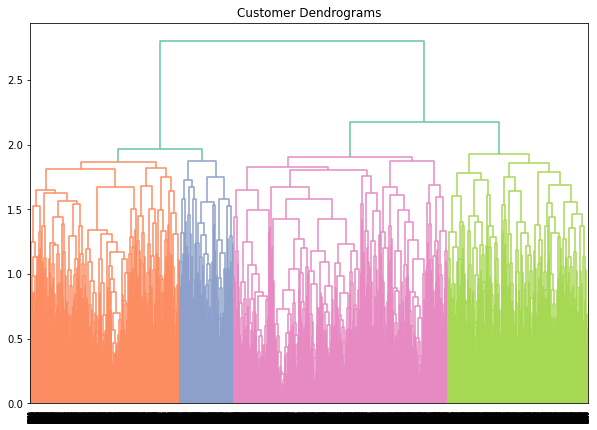

In [21]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df2, method="complete"))

K-MEANS CLUSTERING :

In [22]:
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df2)

KMeans(n_clusters=5, random_state=0)

In [23]:
labels=pd.DataFrame(kmeans.labels_)
labels


,0
0,0
1,2
2,1
3,0
4,0
...,...
8945,4
8946,4
8947,4
8948,4


In [24]:
kmeans.predict(df2)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[-2.76388740e-02  1.66710416e-01 -1.61143251e-01 -1.07130200e-01
  -1.84179205e-01 -7.83359601e-02 -4.05456335e-01 -1.75273579e-01
  -3.59331811e-01  1.89504874e-03 -4.67113108e-02 -2.18173850e-01
  -1.64808404e-01 -1.25656470e-01 -2.79611676e-02 -2.00952706e-01
   1.19894892e-01  2.00000000e+00]
 [-1.95009168e-02  1.34112294e-01  8.82800034e-02  5.39615364e-02
   1.09528403e-01 -7.96033605e-02  3.03382647e-01  1.34947192e-01
   2.76891404e-01 -9.59633221e-02 -7.49990398e-02  1.53254111e-01
   1.54377345e-02  8.38153454e-03 -7.41560269e-03  5.95877033e-03
   9.05423988e-02  7.77156117e-15]
 [ 2.48697765e-01  7.91966819e-02 -8.73368204e-02 -6.14355559e-02
  -9.36495615e-02  3.05440236e-01 -1.97983290e-01 -9.51444140e-02
  -1.74967827e-01  3.62744463e-01  2.78643513e-01 -1.15552387e-01
   1.27641029e-01  6.97929424e-02  3.79376210e-02 -1.04346733e-01
  -2.90231636e-02  6.69803922e-01]
 [-2.13300466e-01 -3.77249927e-01 -7.14337105e-02 -7.08423924e-02
  -3.88045372e-02 -1.22346721e-01 -4.

In [25]:
df2['label']=labels
df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agglo_clust_labels,label
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704,2,0
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796,1,2
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187,0,1
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244,2,0
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146893,0.103128,-0.066344,-0.071050,-0.026403,-0.092916,0.252770,-0.135091,0.234852,-0.134432,-0.094764,-0.069751,-0.191180,-0.096784,-6.964046e-02,0.235672,-0.820660,1,4
8946,-0.151521,0.105735,-0.067173,-0.072846,-0.025067,-0.095266,0.259162,-0.138507,0.240791,-0.137832,-0.097161,-0.071515,-0.196014,-0.102738,-8.960492e-17,-0.107259,-0.841413,1,4
8947,-0.156974,-0.039324,-0.085222,-0.075675,-0.062521,-0.098965,0.181181,-0.143885,0.161230,-0.143183,-0.100933,-0.082821,-0.203625,-0.120978,-7.112317e-02,0.069795,-0.874082,1,4
8948,-0.154320,-0.038411,-0.097240,-0.073918,-0.094139,-0.093057,-0.253016,-0.140545,-0.189902,0.032623,-0.037897,-0.122556,-0.227357,-0.120224,-7.184155e-02,0.068175,-0.853792,1,4


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

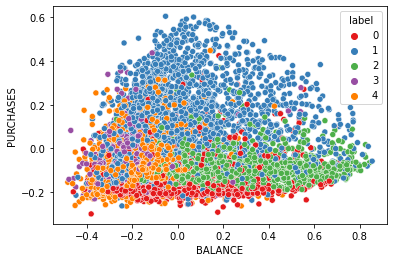

In [26]:
sns.set_palette('Set2')
sns.scatterplot(x=df2['BALANCE'],y=df2['PURCHASES'],hue=df2['label'],palette='Set1')

In [27]:
ssd = []
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df2)
    ssd.append(km.inertia_)  

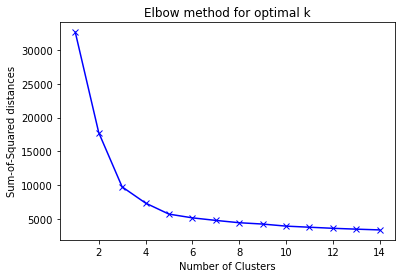

In [29]:
plt.figure()
plt.plot(K,ssd, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum-of-Squared distances")
plt.title("Elbow method for optimal k")
plt.show()

In [30]:
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 3 as number of clusters
kmeans.fit(df2)

KMeans(n_clusters=3, random_state=0)

In [31]:
label=pd.DataFrame(kmeans.labels_)
df2['k_means_labels']=label
df2['k_means_labels'].value_counts()

1    4124
0    2778
2    2048
Name: k_means_labels, dtype: int64

[Text(0.5, 1.0, 'Clusters using K-MEANS clustering')]

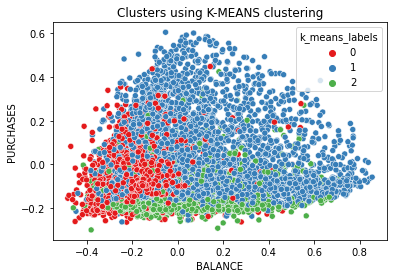

In [32]:
sns.set_palette('Set2')
sns.scatterplot(x=df2['BALANCE'],y=df2['PURCHASES'],hue=df2['k_means_labels'],palette='Set1').set(title='Clusters using K-MEANS clustering')

[Text(0.5, 1.0, 'Clusters using hierarchical clustering')]

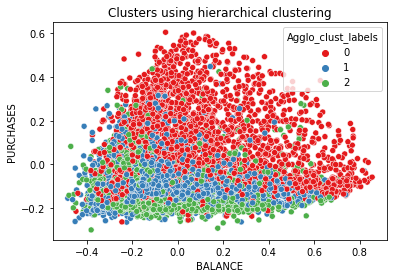

In [33]:
sns.set_palette('Set2')
sns.scatterplot(x=df2['BALANCE'],y=df2['PURCHASES'],hue=df2['Agglo_clust_labels'],palette='Set1').set(title='Clusters using hierarchical clustering')

In this case, the K-means algorithm did a slightly better at job finding the clusters.

ANOTHER VALIDATION METRIC :

In [34]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df2)
    kmeanModel.fit(df2)
  
    distortions.append(sum(np.min(cdist(df2, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df2.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df2, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df2.shape[0]
    mapping2[k] = kmeanModel.inertia_

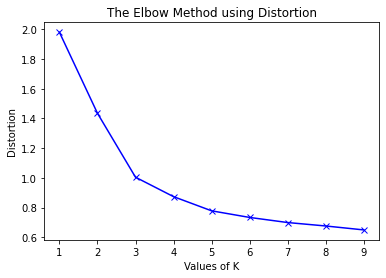

In [35]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

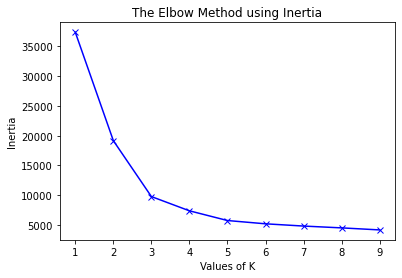

In [36]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

With can observe that with this new validation metric that K=3 is still the best K-value.